# CA/TX Traffic Accident and Flow

# Description 

There are hundreds of thousands of vehicle accidents in Texas and California, some traffic incidents have greater impacts on traffic flow than others. Many factors may contribute to the impact a traffic accident may have on traffic flow to include specific locations, features of the road, and/or weather conditions. If the impact of traffic accidents can be predictable based on these features then local authorities may have a better idea on where to place emergency resources and how to plan road renovations.

# Project Goal

* Discover what drives the impact on traffic flow from accidents
* Use drivers to develop a machine learning model to predict severity
* This information could be used to further our understanding of traffic flow


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# local
import acquire as acq
import prepare as prep
import explore as exp
#import modeling as m

# Acquire

- Data acquired from Kaggle
- Data initially acquired on 6 June 2023
- Dataset shapes before cleaning:
    7.7 million rows, 46 columns
- Each row (after merge) represents a unique traffic accident in the US from 2016 to 2023 
- Each column represents an elements thay may have impacted the flow of traffic

# Prepare

### Prepare Actions:

- Renamed columns to promote readability and merging
- Removed columns
 - very few many null values
 - related to target (fire_size_class)
 - duplicated information
 - too complex to explore for now
- Removed nulls
 - Checked that column data types were appropriate
- Outliers of +1000 acres for fire size were removed
 - 1000 is considered a large wildfire in CA
- Created custom features
- Split data into train, validate and test (approx. 60/20/20)
- Scaled using Standard Scaler for modeling


In [2]:
df = pd.read_csv('output.csv')

In [3]:
df = prep.prep_output(df)

/Users/esayasa./Desktop/Git_repositories/individual-project-1/prepare.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['len_of_affect'], inplace=True)
/Users/esayasa./Desktop/Git_repositories/individual-project-1/prepare.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['weather_condition'], inplace=True)
/Users/esayasa./Desktop/Git_repositories/individual-project-1/prepare.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [4]:
df = prep.remove_outliers(df)

SUMMARY REPORT
          
          
Dataframe head: 
                     severity  distance     city   county state     zipcode  \
start_time                                                                    
2018-12-28 06:11:13         2       0.0  El Paso  El Paso    TX       79938   
2018-12-28 16:43:26         2       0.0  El Paso  El Paso    TX       79938   
2018-12-28 13:59:56         2       0.0  El Paso  El Paso    TX  79936-7910   

                    country  temp  wind_chill  humidity  ...  visibility  \
start_time                                               ...               
2018-12-28 06:11:13      US  39.0        34.8      65.0  ...        10.0   
2018-12-28 16:43:26      US  37.0        29.3      89.0  ...         8.0   
2018-12-28 13:59:56      US  39.0        34.8      89.0  ...         8.0   

                     wind_direction wind_speed_mph  precipitation  \
start_time                                                          
2018-12-28 06:11:13           S

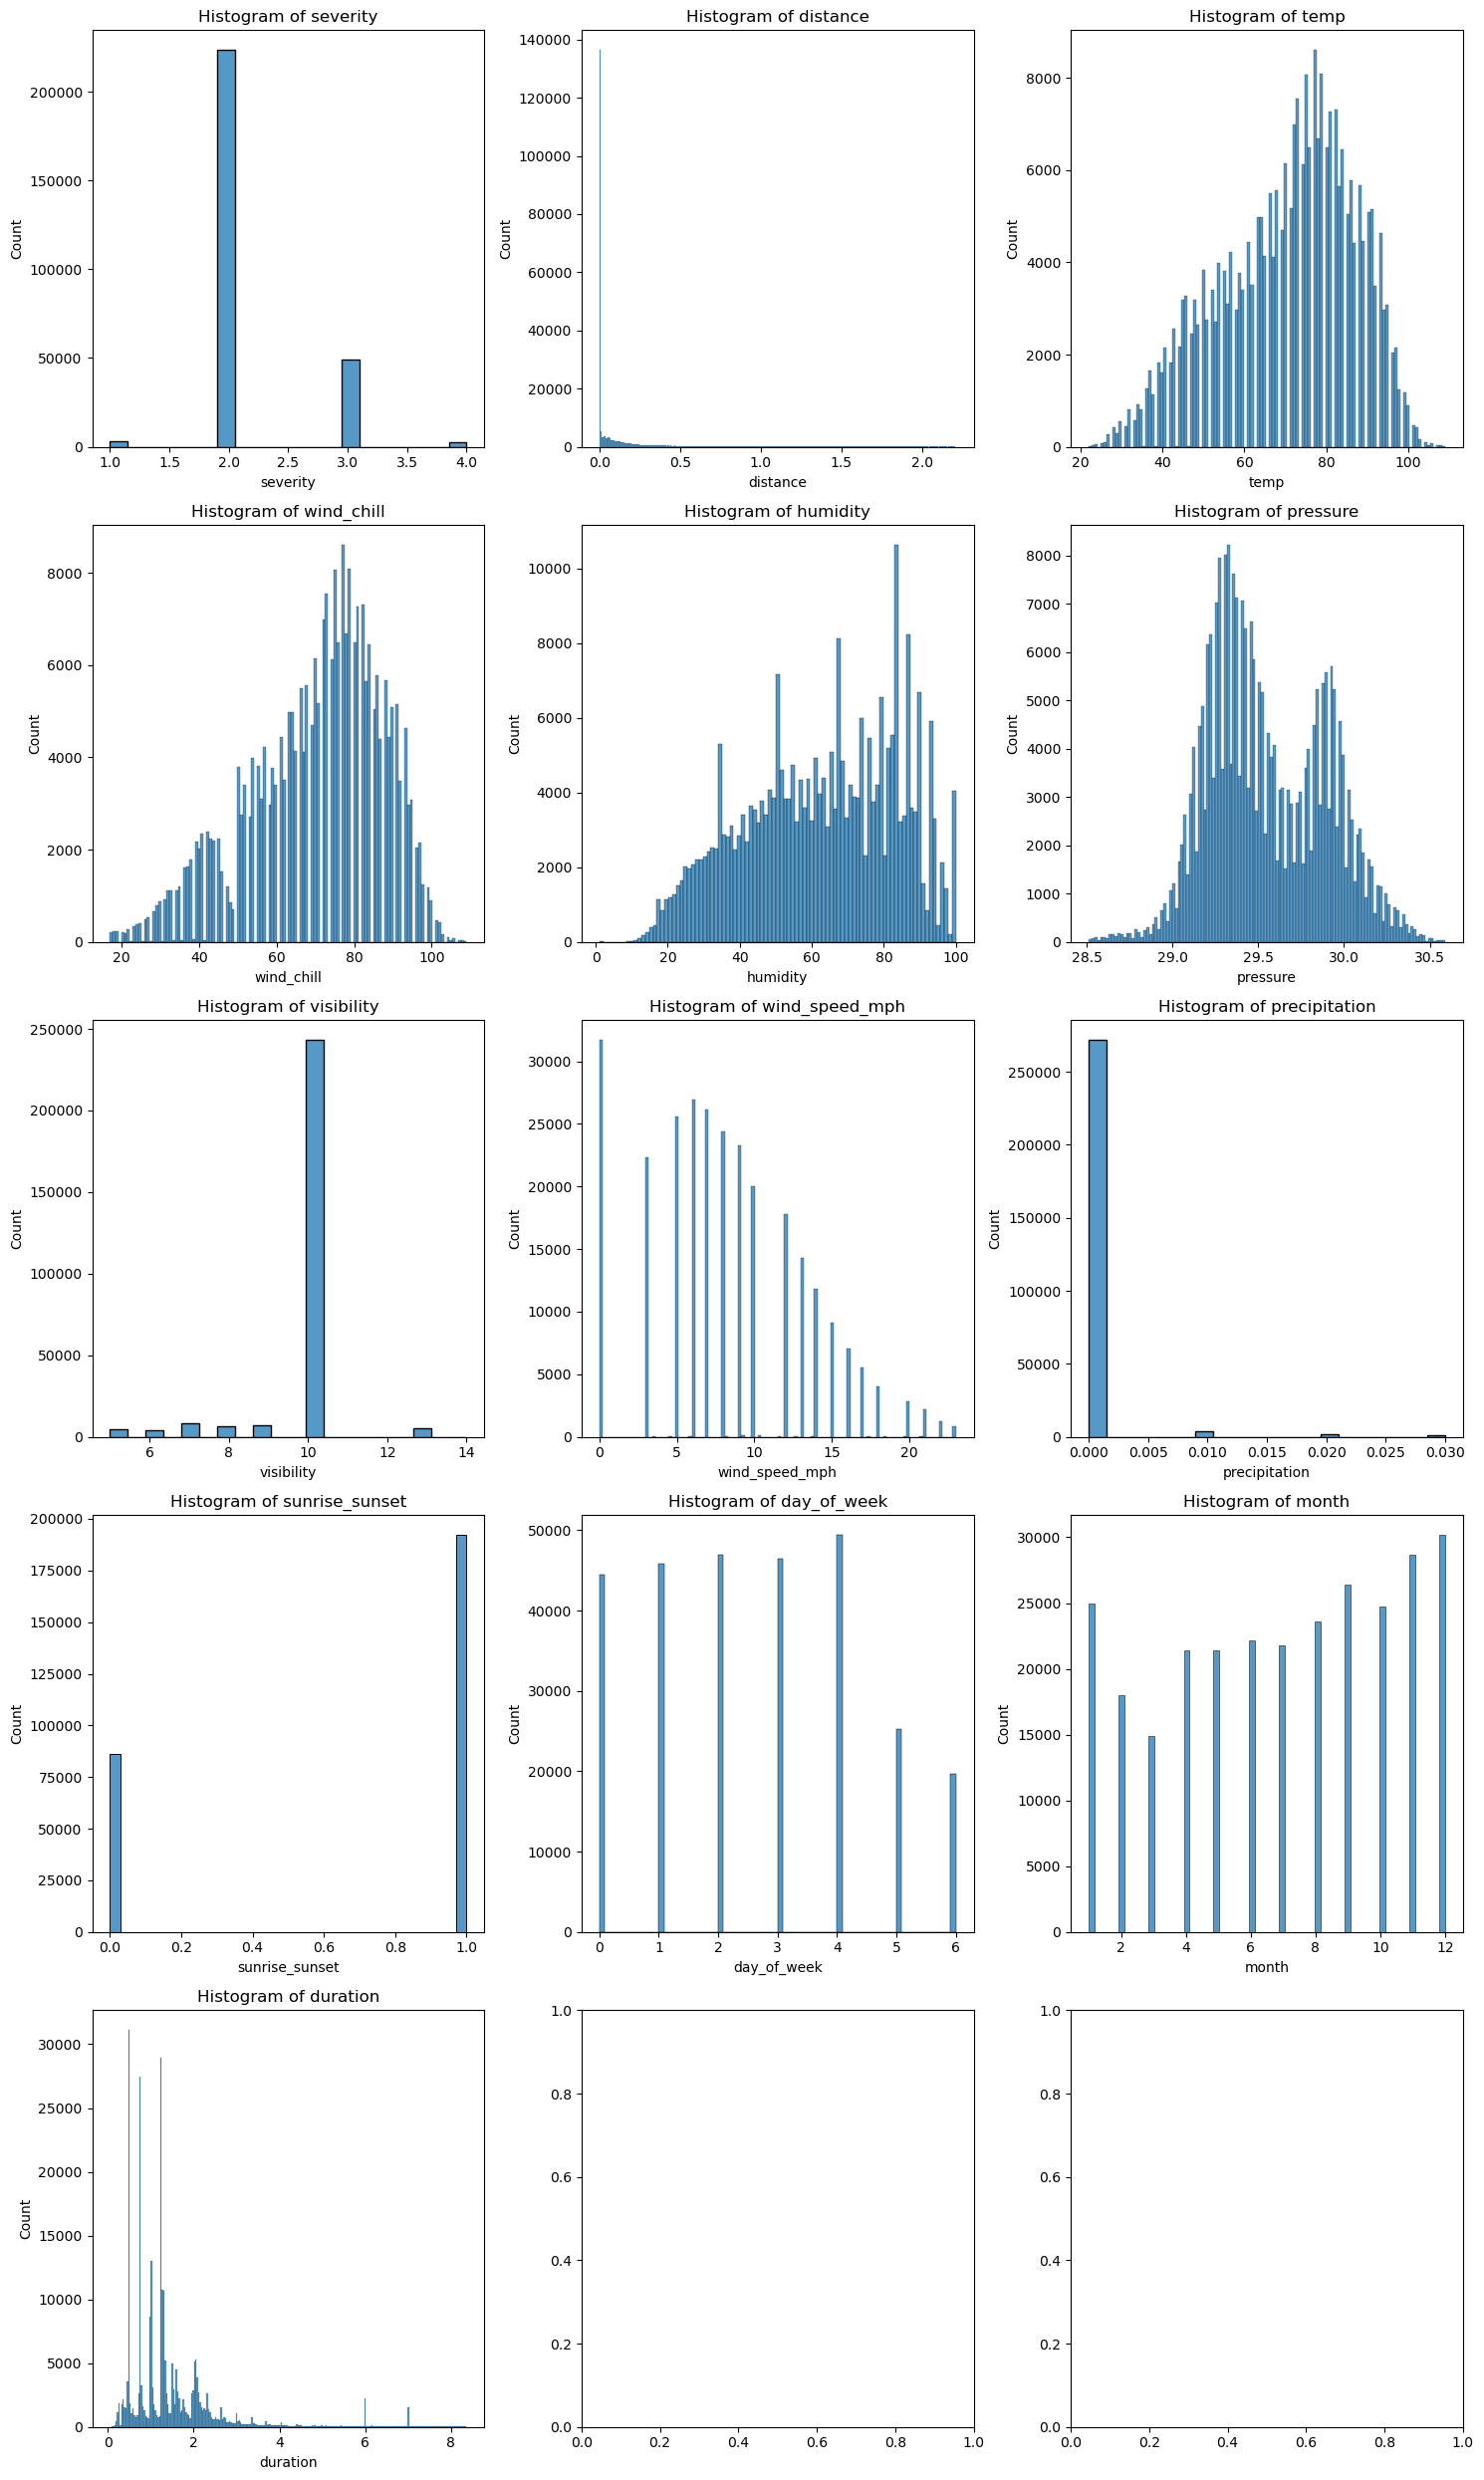

In [5]:
exp.summarize(df)

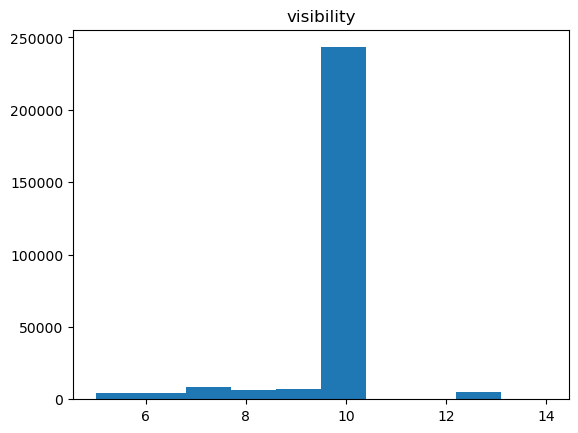

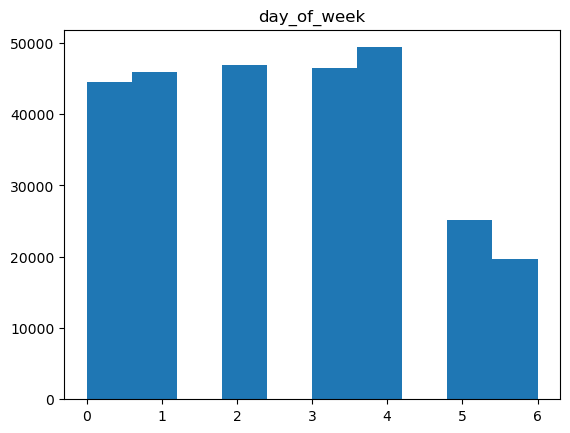

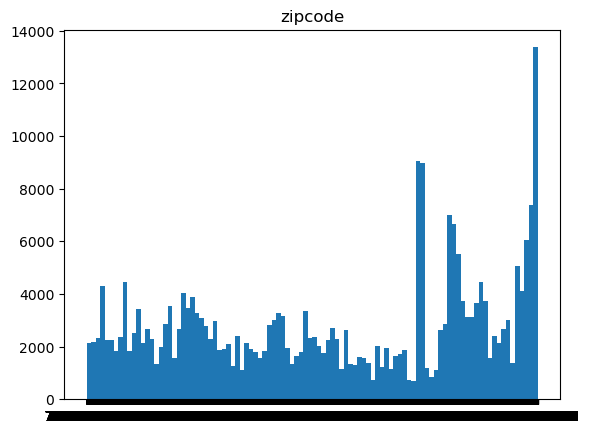

              city  accident_count
217        Houston           78999
110         Dallas           72036
21          Austin           42869
414    San Antonio           18340
163     Fort Worth           10242
319       Mesquite            3797
471          Tyler            3444
231         Irving            2853
16       Arlington            2633
301          Manor            2045
188  Grand Prairie            2024
364   Pflugerville            1668
119      Del Valle            1637
174        Garland            1540
502  Wichita Falls            1530
388     Richardson            1518
69      Carrollton            1512
367          Plano            1434
274     Lewisville            1239
221         Humble            1225
445         Spring            1133
121         Denton            1042
257       Kingwood             917
404     Round Rock             850
23   Balch Springs             663
398       Rockwall             635
130    Duncanville             607
224          Hurst  

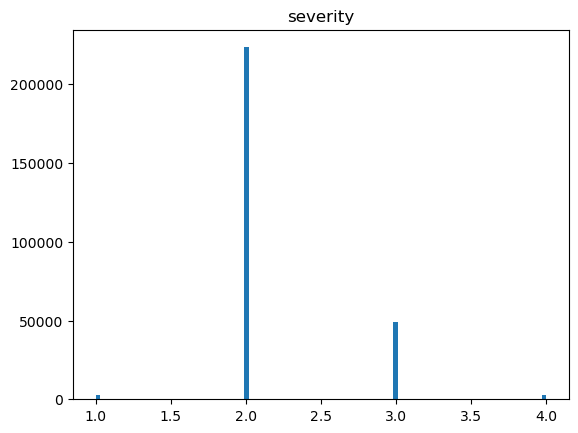

              city  accident_count
217        Houston           78999
110         Dallas           72036
21          Austin           42869
414    San Antonio           18340
163     Fort Worth           10242
319       Mesquite            3797
471          Tyler            3444
231         Irving            2853
16       Arlington            2633
301          Manor            2045
188  Grand Prairie            2024
364   Pflugerville            1668
119      Del Valle            1637
174        Garland            1540
502  Wichita Falls            1530
388     Richardson            1518
69      Carrollton            1512
367          Plano            1434
274     Lewisville            1239
221         Humble            1225
445         Spring            1133
121         Denton            1042
257       Kingwood             917
404     Round Rock             850
23   Balch Springs             663
398       Rockwall             635
130    Duncanville             607
224          Hurst  

(None, None)

In [6]:
exp.vis(df)

#### Initial Observations:

Many observations about the trends are counterintuitive. Most of the incidents occurred when visibility was 10 miles plus and tended to trend toward fair, cloudy weather conditions. Though incidents occurred most often in the winter, they also occurred most often in temperature and wind chill ranging between 70 and 90 degrees and precipitation that is below 1 inch. Half of the accidents occurred in 3 cities, Houston, Dallas, and Austin with Houston by far hosting the most incidents by 6000 incidents however by zipcode the DFW Metropolitan Area hosted the top 5 incidents.

In [7]:
#REmove all classification values
df = prep.remove_class(df)

In [8]:
train, val, test = prep.split_data(df)

In [9]:
train.dtypes

severity            int64
distance          float64
temp              float64
wind_chill        float64
humidity          float64
pressure          float64
visibility        float64
wind_direction      int64
wind_speed_mph    float64
precipitation     float64
sunrise_sunset    float64
day_of_week         int64
month               int64
season              int64
duration          float64
dtype: object

## Explore
- Does temperature effect severity ratings ?
- Does wind speed effect severity ratings?
- Does duration effect severity ratings?
- Does atmospheric pressure effect severity ratings?

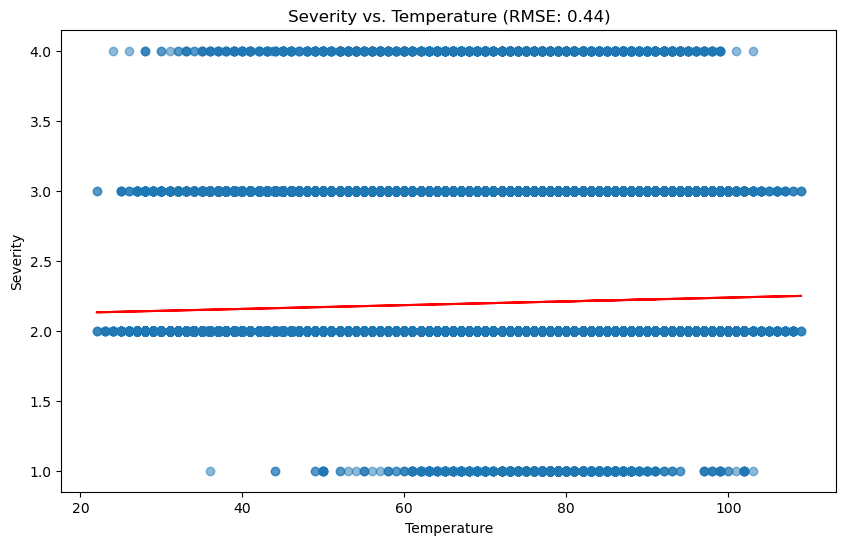

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
model = LinearRegression()
X = train[['temp']]
y = train['severity']
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate RMSE
rmse = mean_squared_error(y, y_pred, squared=False)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train['temp'], train['severity'], alpha=0.5)
plt.plot(train['temp'], y_pred, color='red')
plt.title(f'Severity vs. Temperature (RMSE: {rmse:.2f})')
plt.xlabel('Temperature')
plt.ylabel('Severity')
plt.show()


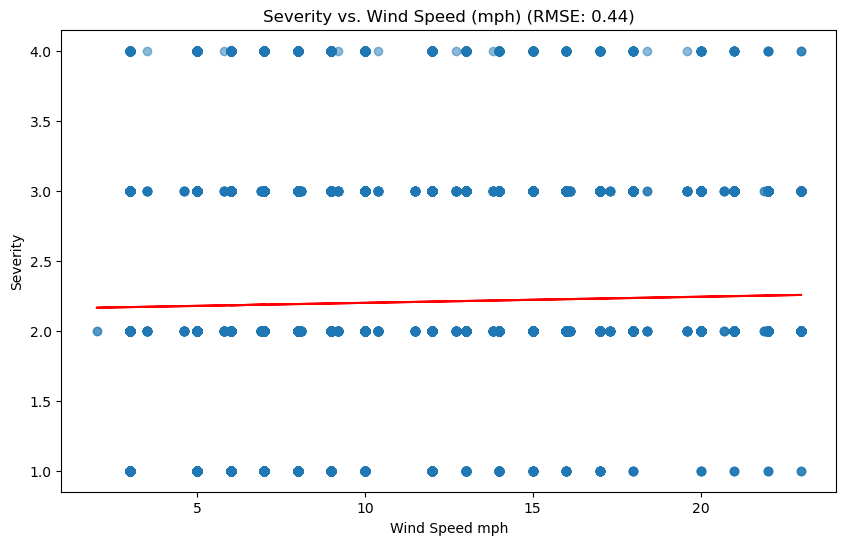

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
model = LinearRegression()
X = train[['wind_speed_mph']]
y = train['severity']
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate RMSE
rmse = mean_squared_error(y, y_pred, squared=False)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train['wind_speed_mph'], train['severity'], alpha=0.5)
plt.plot(train['wind_speed_mph'], y_pred, color='red')
plt.title(f'Severity vs. Wind Speed (mph) (RMSE: {rmse:.2f})')
plt.xlabel('Wind Speed mph')
plt.ylabel('Severity')
plt.show()


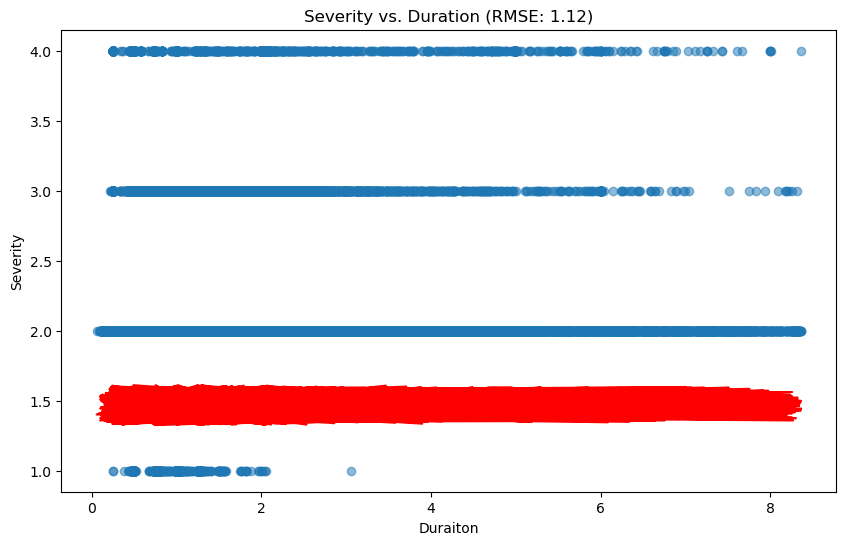

In [12]:
# Fit a linear regression model
model = LinearRegression()
X = train[['temp']]
y = train['duration']
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate RMSE
rmse = mean_squared_error(y, y_pred, squared=False)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train['duration'], train['severity'], alpha=0.5)
plt.plot(train['duration'], y_pred, color='red')
plt.title(f'Severity vs. Duration (RMSE: {rmse:.2f})')
plt.xlabel('Duraiton')
plt.ylabel('Severity')
plt.show()


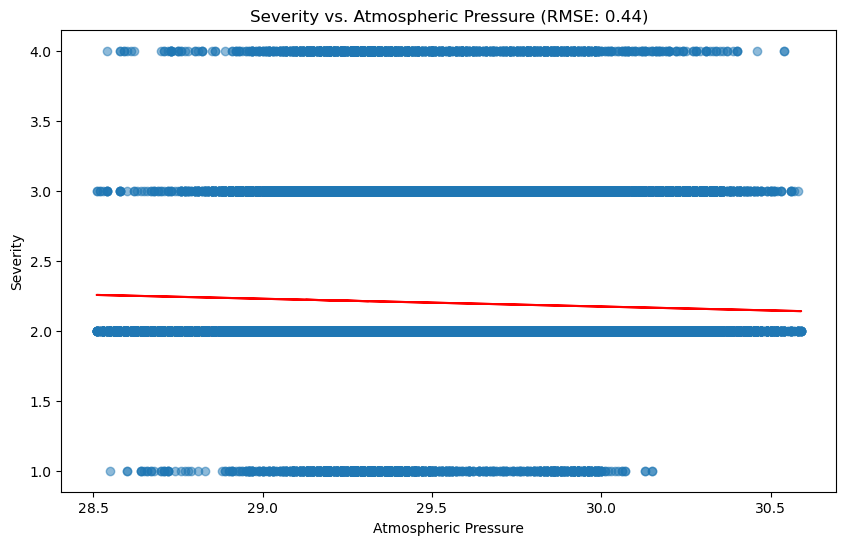

In [13]:
# Fit a linear regression model
model = LinearRegression()
X = train[['pressure']]
y = train['severity']
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate RMSE
rmse = mean_squared_error(y, y_pred, squared=False)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train['pressure'], train['severity'], alpha=0.5)
plt.plot(train['pressure'], y_pred, color='red')
plt.title(f'Severity vs. Atmospheric Pressure (RMSE: {rmse:.2f})')
plt.xlabel('Atmospheric Pressure')
plt.ylabel('Severity')
plt.show()


In [14]:
from sklearn.preprocessing import RobustScaler

def robs(train, validate, test, scale=None):
    """
    The function applies the RobustScaler method to scale the numerical features of the train, validate,
    and test datasets, excluding the 'severity' column.
    
    :param train: a pandas DataFrame containing the training data
    :param validate: The validation dataset, which is used to evaluate the performance of the model
    during training and to tune hyperparameters
    :param test: The "test" parameter is a dataset that is used to evaluate the performance of a machine
    learning model that has been trained on the "train" dataset and validated on the "validate" dataset.
    The "test" dataset is typically used to simulate real-world scenarios and to ensure that the model
    is able
    :return: three dataframes: Xtr (scaled training data), Xv (scaled validation data), and Xt (scaled
    test data).
    """
    if scale is None:
        scale = train.columns.to_list()
    scale = [col for col in scale if col != 'severity']
    rob_scale = RobustScaler()
    Xtr, Xv, Xt = train[scale], validate[scale], test[scale]
    Xtr = pd.DataFrame(rob_scale.fit_transform(train[scale]), train.index, scale)
    Xv = pd.DataFrame(rob_scale.transform(validate[scale]), validate.index, scale)
    Xt = pd.DataFrame(rob_scale.transform(test[scale]), test.index, scale)
    for col in scale:
        Xtr = Xtr.rename(columns={col: f'{col}_s'})
        Xv = Xv.rename(columns={col: f'{col}_s'})
        Xt = Xt.rename(columns={col: f'{col}_s'})
    return Xtr, Xv, Xt


In [15]:
Xtr,Xv,Xt = train.drop(columns=['severity']),val.drop(columns=['severity']),test.drop(columns=['severity'])
Xtr_s,Xv_s,Xt_s = robs(Xtr,Xv,Xt)
ytr,yv,yt = train[['severity']],val[['severity']],test[['severity']]
Xtr_s.sample(1)

,distance_s,temp_s,wind_chill_s,humidity_s,pressure_s,visibility_s,wind_direction_s,wind_speed_mph_s,precipitation_s,sunrise_sunset_s,day_of_week_s,month_s,season_s,duration_s
start_time,,,,,,,,,,,,,,
2022-12-21 15:44:42,1.221106,-1.0,-1.0,-0.272727,0.070175,0.0,0.0,-0.428571,0.0,0.0,-0.333333,0.833333,-0.666667,-0.352681


In [16]:
def reg_mods(Xtr,ytr,Xv,yv,features=None,alpha=1,degree=2):
    '''
    Input X_train,y_train,X_val,y_val, list of features, alpha, and degree
    so that function will run through linear regression, lasso lars, and
    polynomial feature regression
    - diff feature combos
    - diff hyper params
    - output as df
    '''
    if features is None:
        features = Xtr.columns.to_list()
    # baseline as mean
    pred_mean = ytr.mean()[0]
    ytr_p = ytr.assign(pred_mean=pred_mean)
    yv_p = yv.assign(pred_mean=pred_mean)
    rmse_tr = mean_squared_error(ytr,ytr_p.pred_mean)**.5
    rmse_v = mean_squared_error(yv,yv_p.pred_mean)**.5
    r2_tr = r2_score(ytr, ytr_p.pred_mean)
    r2_v = r2_score(yv, yv_p.pred_mean)
    output = {
            'model':'bl_mean',
            'features':'None',
            'params':'None',
            'rmse_tr':rmse_tr,
            'rmse_v':rmse_v,
            'r2_tr':r2_tr,
            'r2_v':r2_v
        }
    metrics = [output]
    # create iterable for feature combos
    for r in range(1,(len(features)+1)):
        # cycle through feature combos for linear reg
        for feature in itertools.combinations(features,r):
            f = list(feature)
            # linear regression
            lr = LinearRegression()
            lr.fit(Xtr[f],ytr)
            # metrics
            pred_lr_tr = lr.predict(Xtr[f])
            rmse_tr,r2_tr = metrics_reg(ytr,pred_lr_tr)
            pred_lr_v = lr.predict(Xv[f])
            rmse_v,r2_v = metrics_reg(yv,pred_lr_v)
            # table-ize
            output ={
                    'model':'LinearRegression',
                    'features':f,
                    'params':'None',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos and alphas for lasso lars
        for feature,a in itertools.product(itertools.combinations(features,r),alpha):
            f = list(feature)
            # lasso lars
            ll = LassoLars(alpha=a,normalize=False,random_state=42)
            ll.fit(Xtr[f],ytr)
            # metrics
            pred_ll_tr = ll.predict(Xtr[f])
            rmse_tr,r2_tr = metrics_reg(ytr,pred_ll_tr)
            pred_ll_v = ll.predict(Xv[f])
            rmse_v,r2_v = metrics_reg(yv,pred_ll_v)
            # table-ize
            output ={
                    'model':'LassoLars',
                    'features':f,
                    'params':f'alpha={a}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
        # cycle through feature combos and degrees for polynomial feature reg
        for feature,d in itertools.product(itertools.combinations(features,r),degree):
            f = list(feature)
            # polynomial feature regression
            pf = PolynomialFeatures(degree=d)
            Xtr_pf = pf.fit_transform(Xtr[f])
            Xv_pf = pf.transform(Xv[f])
            lp = LinearRegression()
            lp.fit(Xtr_pf,ytr)
            # metrics
            pred_lp_tr = lp.predict(Xtr_pf)
            rmse_tr,r2_tr = metrics_reg(ytr,pred_lp_tr)
            pred_lp_v = lp.predict(Xv_pf)
            rmse_v,r2_v = metrics_reg(yv,pred_lp_v)
            # table-ize
            output ={
                    'model':'PolynomialFeature',
                    'features':f,
                    'params':f'degree={d}',
                    'rmse_tr':rmse_tr,
                    'rmse_v':rmse_v,
                    'r2_tr':r2_tr,
                    'r2_v':r2_v
                }
            metrics.append(output)
    return pd.DataFrame(metric)

In [17]:
def metrics_reg(y, y_pred):
    """
    Input y and y_pred & get RMSE, R2
    """
    rmse = mean_squared_error(y, y_pred, squared=False)
    r2 = r2_score(y, y_pred)
    return round(rmse,2), round(r2,4)

In [ ]:

metric = reg_mods(Xtr,ytr,Xv,yv,alpha=[1,2],degree=[2,3],features=None)


In [ ]:
metric